In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [2]:
togo_data=pd.read_csv("../data/data/togo-dapaong_qc.csv")
togo_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


### Task 2 

#### Summary statistics and missing value Report


In [6]:

togo_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [7]:
togo_data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [8]:
# Data which have more than 5 null value
togo_data.isna().mean().loc[lambda x: x > 0.05]

Comments    1.0
dtype: float64

In [9]:
togo_data.shape

(525600, 19)

### Outlier Detections and Cleanings
 

In [24]:
togo_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [25]:
outlier_check_col=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB']

In [26]:
z_scores=togo_data[outlier_check_col].apply(zscore)
outlier=(np.abs(z_scores)>3).any(axis=1)

In [27]:
print(f"outliers: {outlier.sum()} rows")

outliers: 20178 rows


In [28]:
cleaned_data=togo_data[~outlier].copy()

In [29]:
cleaned_data.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         505422
dtype: int64

In [30]:
cleaned_data.to_csv("../data/togo_data_clean.csv", index=False)


In [31]:
cleaned_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

<Figure size 4000x500 with 0 Axes>

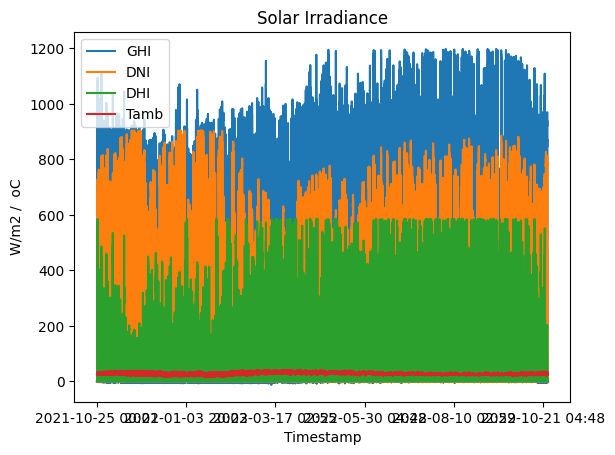

In [32]:
plt.figure(figsize=(40,5))
cleaned_data.set_index("Timestamp")[['GHI','DNI','DHI','Tamb']].plot()
plt.title("Solar Irradiance")
plt.ylabel('W/m2 /  oC')
plt.show()

### To visually analyse the the difference I could make it permonth

In [33]:
cleaned_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [34]:
cleaned_data['Timestamp']=pd.to_datetime(cleaned_data['Timestamp'])
cleaned_data.set_index('Timestamp',inplace=True)
monthly_data = cleaned_data.resample('ME')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


<Figure size 1500x600 with 0 Axes>

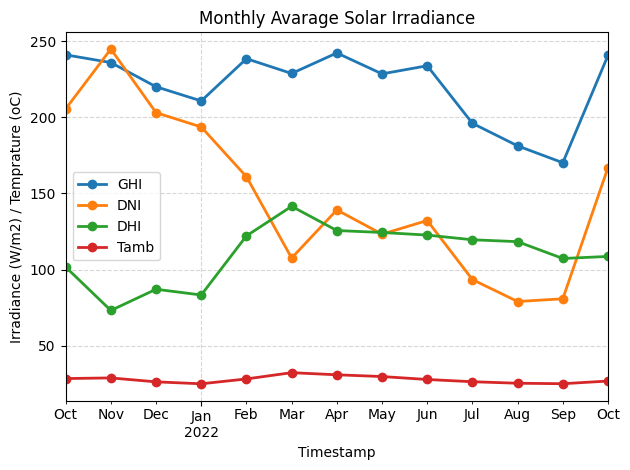

In [35]:
plt.figure(figsize=(15,6))
monthly_data.plot(marker='o',linewidth=2)
plt.title("Monthly Avarage Solar Irradiance")
plt.grid(True,linestyle='--',alpha=0.5)
plt.ylabel("Irradiance (W/m2) / Temprature (oC)")
plt.tight_layout()
plt.show()

This chart shows that, during November and October, the the GHI and DNI has peack value

### group by ModA and ModB

In [36]:
cleaned_group=cleaned_data.groupby('Cleaning')[['ModA','ModB']].mean()

<Axes: title={'center': 'Avarage ModA and ModB pre/cost cleaning'}, xlabel='Cleaning'>

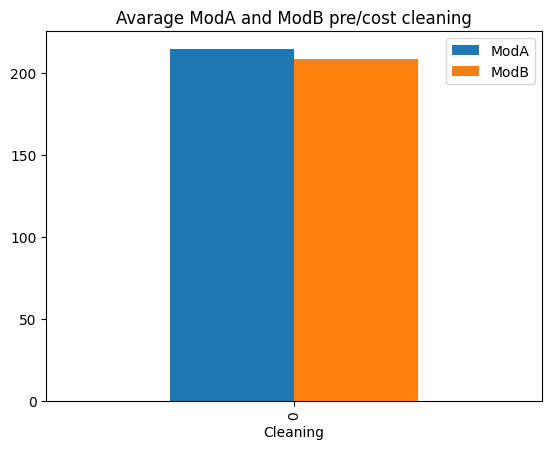

In [37]:
cleaned_group.plot(kind='bar',title="Avarage ModA and ModB pre/cost cleaning")

### Heat map description

<Axes: >

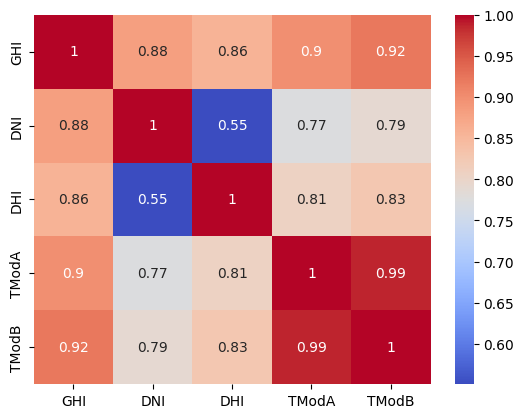

In [39]:
sns.heatmap(cleaned_data[['GHI','DNI','DHI','TModA', 'TModB']].corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='WS', ylabel='GHI'>

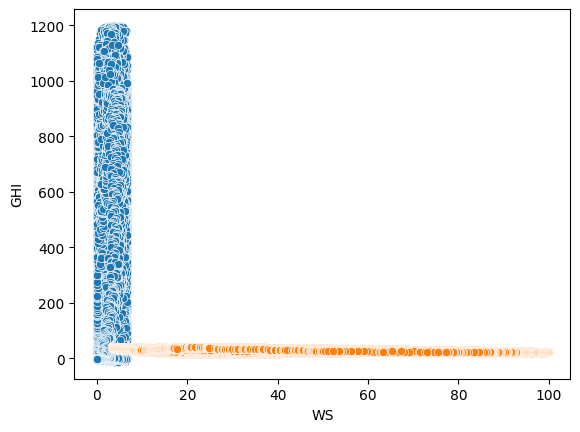

In [40]:
sns.scatterplot(data=cleaned_data, x='WS',y='GHI')
sns.scatterplot(data=cleaned_data, x='RH',y='Tamb')

In [41]:
#cleaned_group=cleaned_data.groupby('Cleaning')[['WS','WD']].mean()
#cleaned_group.plot(kind='bar',title="radial bar plot of WS/WD")

<Axes: title={'center': 'Distribution of Global Horizontal Irradiance,'}, ylabel='Frequency'>

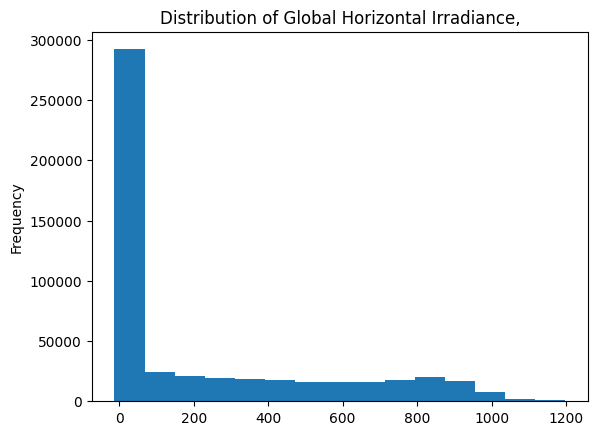

In [42]:
cleaned_data['GHI'].plot(kind='hist',bins=15,title='Distribution of Global Horizontal Irradiance,')


<Axes: title={'center': 'Distribution Of Distribution of Wind Speed"'}, ylabel='Frequency'>

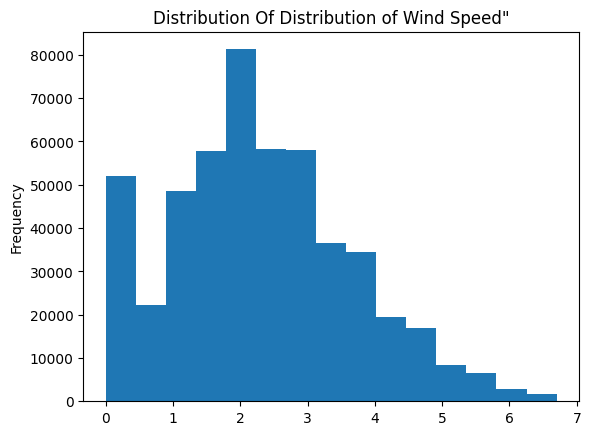

In [43]:
cleaned_data['WS'].plot(kind='hist',bins=15, title='Distribution Of Distribution of Wind Speed"')

Text(0.5, 1.0, 'GHI Vs Tamb (Bubble size = RH)')

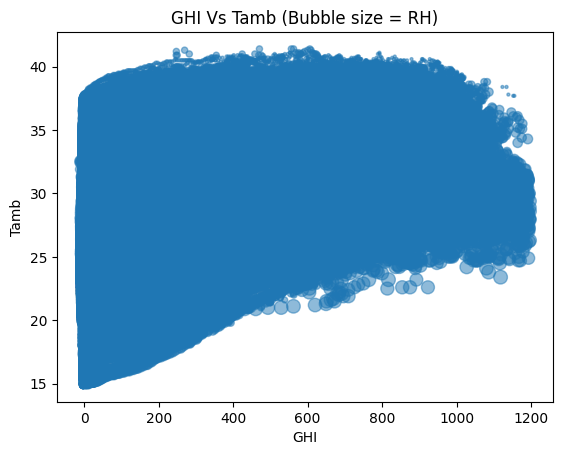

In [44]:
plt.scatter(cleaned_data['GHI'],cleaned_data['Tamb'], s=cleaned_data['RH'],alpha=0.5)
plt.xlabel("GHI")
plt.ylabel('Tamb')
plt.title("GHI Vs Tamb (Bubble size = RH)")

Text(0.5, 1.0, 'GHI Vs Tamb (Bubble size = RHBP)')

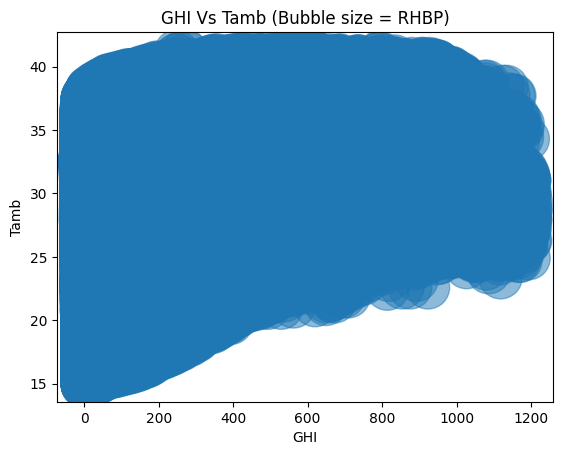

In [45]:
plt.scatter(cleaned_data['GHI'],cleaned_data['Tamb'], s=cleaned_data['BP'],alpha=0.5)
plt.xlabel("GHI")
plt.ylabel('Tamb')
plt.title("GHI Vs Tamb (Bubble size = RHBP)")